In [ ]:
!git clone https://github.com/thepochynsons/pytorch-CycleGAN-and-pix2pix.git


Cloning into 'pytorch-CycleGAN-and-pix2pix'...
remote: Enumerating objects: 2381, done.
remote: Total 2381 (delta 0), reused 0 (delta 0), pack-reused 2381 (from 1)
Receiving objects: 100% (2381/2381), 8.14 MiB | 16.57 MiB/s, done.
Resolving deltas: 100% (1515/1515), done.


In [ ]:
import os
os.chdir('pytorch-CycleGAN-and-pix2pix/')
# install dependencies
!pip install -r requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 61.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for visdom: filename=visdom-0.2.4-py3-none-any.whl size=1408195 sha256=b5738dbde9d0ecc5027e4057c2e0a6f206d66a144ffae33e51647e88c0bb9f7a
  Stored in directory: /root/.cache/pip/wheels/42/29/49/5bed207bac4578e4d2c0c5fc0226bfd33a7e2953ea56356855
Successfully built visdom


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


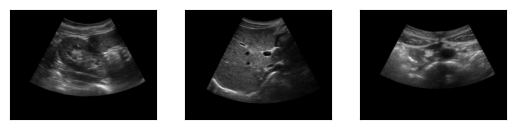

In [ ]:
# SHOW ABDOMINAL_US DATASET IMAGES
from os import path
from PIL import Image
import matplotlib.pyplot as plt

images = ['c37','j26','c15']
fig = plt.figure()
# for each input image
for idx in range(len(images)):
    # add a subplot
    ax = fig.add_subplot(1, len(images), idx+1, xticks=[], yticks=[])
    # display the image
    plt.imshow(Image.open(path.join("/content/drive/MyDrive/Dataset_ACSI/US_acsi/abdominal_US/abdominal_US/RUS/images/train",images[idx] + '.jpg')),cmap='gist_gray')

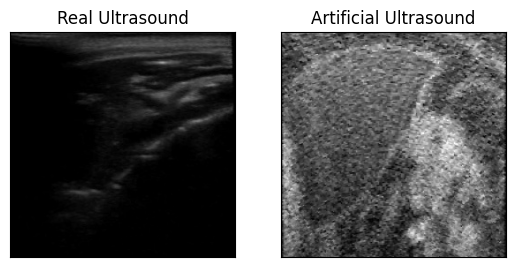

In [ ]:
# SHOW AUS2RUS DATASET IMAGES

rus_example = Image.open('/content/drive/MyDrive/Dataset_ACSI/US_acsi/aus2rus/aus2rus/trainB/rotated_rezized_pacienteC1.jpg')
aus_example = Image.open('/content/drive/MyDrive/Dataset_ACSI/US_acsi/aus2rus/aus2rus/trainA/rezized_ct14-1.png')
fig = plt.figure()
ax = fig.add_subplot(1, 2, 1, xticks=[], yticks=[], title='Real Ultrasound')
plt.imshow(rus_example)
ax = fig.add_subplot(1, 2, 2, xticks=[], yticks=[], title='Artificial Ultrasound')
plt.imshow(aus_example)
plt.show()

In [ ]:
os.mkdir('./checkpoints')

In [ ]:
!cp -r /content/drive/MyDrive/Dataset_ACSI/US_acsi/pretrained_model_aus2rus/aus2rus ./checkpoints/aus2rus

In [ ]:
!python train.py --dataroot /content/drive/MyDrive/Dataset_ACSI/US_acsi/aus2rus/aus2rus --name new_aus2rus --model cycle_gan  --gan_mode vanilla --norm instance --netG unet_256 --preprocess none --input_nc 1 --output_nc 1 #--n_epochs 10

cycleganmodel
----------------- Options ---------------
               batch_size: 1                             
                    beta1: 0.5                           
          checkpoints_dir: ./checkpoints                 
           continue_train: False                         
                crop_size: 256                           
                 dataroot: /content/drive/MyDrive/Dataset_ACSI/US_acsi/aus2rus/aus2rus	[default: None]
             dataset_mode: unaligned                     
                direction: AtoB                          
              display_env: main                          
             display_freq: 400                           
               display_id: 0                             
            display_ncols: 4                             
             display_port: 8097                          
           display_server: http://localhost/             
          display_winsize: 256                           
                    epoch: la

In [ ]:
#Translate AUS to RUS
!python ultrasound_test.py --dataroot /content/drive/MyDrive/Dataset_ACSI/US_acsi/aus2rus/aus2rus --name aus2rus --model cycle_gan --netG unet_256 --input_nc 1 --output_nc 1 --results_dir /content/drive/MyDrive/Dataset_ACSI/US_acsi/aus2rus/aus2rus/results/fakeRUS --direction AtoB

cycleganmodel
----------------- Options ---------------
             aspect_ratio: 1.0                           
               batch_size: 1                             
          checkpoints_dir: ./checkpoints                 
                crop_size: 256                           
                 dataroot: /content/drive/MyDrive/Dataset_ACSI/US_acsi/aus2rus/aus2rus	[default: None]
             dataset_mode: unaligned                     
                direction: AtoB                          
          display_winsize: 256                           
                    epoch: latest                        
                     eval: False                         
                  gpu_ids: 0                             
                init_gain: 0.02                          
                init_type: normal                        
                 input_nc: 1                             	[default: 3]
                  isTrain: False                         	[default: None]


In [ ]:
#Translate AUS to RUS #### PRUEBA
!python ultrasound_test.py --dataroot /content/drive/MyDrive/Dataset_ACSI/US_acsi/aus2rus/aus2rus --name aus2rus --model cycle_gan --netG unet_256 --input_nc 1 --output_nc 1 --results_dir /content/drive/MyDrive/Dataset_ACSI/US_acsi/aus2rus/aus2rus/results/fakeRUS_CT_Test --direction AtoB

cycleganmodel
----------------- Options ---------------
             aspect_ratio: 1.0                           
               batch_size: 1                             
          checkpoints_dir: ./checkpoints                 
                crop_size: 256                           
                 dataroot: /content/drive/MyDrive/Dataset_ACSI/US_acsi/aus2rus/aus2rus	[default: None]
             dataset_mode: unaligned                     
                direction: AtoB                          
          display_winsize: 256                           
                    epoch: latest                        
                     eval: False                         
                  gpu_ids: 0                             
                init_gain: 0.02                          
                init_type: normal                        
                 input_nc: 1                             	[default: 3]
                  isTrain: False                         	[default: None]


In [ ]:
#Translate RUS to AUS
!python ultrasound_test.py --dataroot /content/drive/MyDrive/Dataset_ACSI/US_acsi/aus2rus/aus2rus --name aus2rus --model cycle_gan --netG unet_256 --input_nc 1 --output_nc 1 --results_dir /content/drive/MyDrive/Dataset_ACSI/US_acsi/results/fakeAUS --direction BtoA

cycleganmodel
----------------- Options ---------------
             aspect_ratio: 1.0                           
               batch_size: 1                             
          checkpoints_dir: ./checkpoints                 
                crop_size: 256                           
                 dataroot: /content/drive/MyDrive/Dataset_ACSI/US_acsi/aus2rus/aus2rus	[default: None]
             dataset_mode: unaligned                     
                direction: BtoA                          	[default: AtoB]
          display_winsize: 256                           
                    epoch: latest                        
                     eval: False                         
                  gpu_ids: 0                             
                init_gain: 0.02                          
                init_type: normal                        
                 input_nc: 1                             	[default: 3]
                  isTrain: False                         	

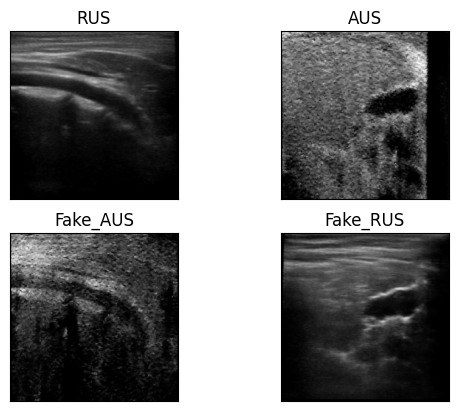

In [ ]:
# Original images
rus = Image.open('/content/drive/MyDrive/Dataset_ACSI/US_acsi/aus2rus/aus2rus/testB/rotated_rezized_pacienteA1.jpg')
aus = Image.open('/content/drive/MyDrive/Dataset_ACSI/US_acsi/aus2rus/aus2rus/testA/rezized_ct11-7.png')

# Fake images
fake_aus = Image.open('/content/drive/MyDrive/Dataset_ACSI/US_acsi/aus2rus/aus2rus/results/fakeAUS/rotated_rezized_pacienteA1.png')
fake_rus = Image.open('/content/drive/MyDrive/Dataset_ACSI/US_acsi/aus2rus/aus2rus/results/fakeRUS/rezized_ct11-7.png')

fig = plt.figure()

ax = fig.add_subplot(2, 2, 1, xticks=[], yticks=[], title='RUS')
plt.imshow(rus)

ax = fig.add_subplot(2, 2, 2, xticks=[], yticks=[], title='AUS')
plt.imshow(aus)

ax = fig.add_subplot(2, 2, 3, xticks=[], yticks=[], title='Fake_AUS')
plt.imshow(fake_aus)

ax = fig.add_subplot(2, 2, 4, xticks=[], yticks=[], title='Fake_RUS')
plt.imshow(fake_rus)

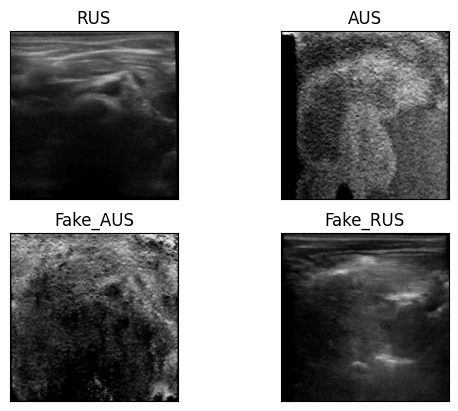

In [ ]:
# Original images
rus = Image.open('/content/drive/MyDrive/Dataset_ACSI/US_acsi/aus2rus/aus2rus/testB/rotated_rezized_pacienteA33.jpg')
aus = Image.open('/content/drive/MyDrive/Dataset_ACSI/US_acsi/aus2rus/aus2rus/testA/resized_ct1-52.png')

# Fake images
fake_aus = Image.open('/content/drive/MyDrive/Dataset_ACSI/US_acsi/aus2rus/aus2rus/results/fakeAUS/rotated_rezized_pacienteA33.png')
fake_rus = Image.open('/content/drive/MyDrive/Dataset_ACSI/US_acsi/aus2rus/aus2rus/results/fakeRUS/resized_ct1-52.png')

fig = plt.figure()

ax = fig.add_subplot(2, 2, 1, xticks=[], yticks=[], title='RUS')
plt.imshow(rus)

ax = fig.add_subplot(2, 2, 2, xticks=[], yticks=[], title='AUS')
plt.imshow(aus)

ax = fig.add_subplot(2, 2, 3, xticks=[], yticks=[], title='Fake_AUS')
plt.imshow(fake_aus)

ax = fig.add_subplot(2, 2, 4, xticks=[], yticks=[], title='Fake_RUS')
plt.imshow(fake_rus)

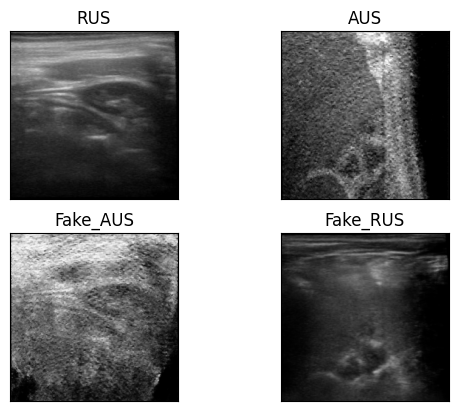

In [ ]:
import os
import random
from PIL import Image
import matplotlib.pyplot as plt

# Define los directorios para imágenes originales y generadas
dir_rus = '/content/drive/MyDrive/Dataset_ACSI/US_acsi/aus2rus/aus2rus/testB/'
dir_aus = '/content/drive/MyDrive/Dataset_ACSI/US_acsi/aus2rus/aus2rus/testA/'
dir_fake_aus = '/content/drive/MyDrive/Dataset_ACSI/US_acsi/aus2rus/aus2rus/results/fakeAUS/'
dir_fake_rus = '/content/drive/MyDrive/Dataset_ACSI/US_acsi/aus2rus/aus2rus/results/fakeRUS/'

# Selecciona una imagen aleatoria de cada directorio
rus_image = random.choice([f for f in os.listdir(dir_rus) if f.endswith('.jpg') or f.endswith('.png')])
aus_image = random.choice([f for f in os.listdir(dir_aus) if f.endswith('.jpg') or f.endswith('.png')])
fake_aus_image = rus_image.replace('.jpg', '.png')  # Suponiendo que los nombres son iguales
fake_rus_image = aus_image.replace('.jpg', '.png')  # Suponiendo que los nombres son iguales

# Carga las imágenes
rus = Image.open(os.path.join(dir_rus, rus_image))
aus = Image.open(os.path.join(dir_aus, aus_image))
fake_aus = Image.open(os.path.join(dir_fake_aus, fake_aus_image))
fake_rus = Image.open(os.path.join(dir_fake_rus, fake_rus_image))

# Crear la figura y agregar los subplots
fig = plt.figure()

ax = fig.add_subplot(2, 2, 1, xticks=[], yticks=[], title='RUS')
plt.imshow(rus)

ax = fig.add_subplot(2, 2, 2, xticks=[], yticks=[], title='AUS')
plt.imshow(aus)

ax = fig.add_subplot(2, 2, 3, xticks=[], yticks=[], title='Fake_AUS')
plt.imshow(fake_aus)

ax = fig.add_subplot(2, 2, 4, xticks=[], yticks=[], title='Fake_RUS')
plt.imshow(fake_rus)

# Mostrar las imágenes
plt.show()


Archivo seleccionado: Case_00801_0000.nii
Dimensiones de la imagen: (512, 512, 95)


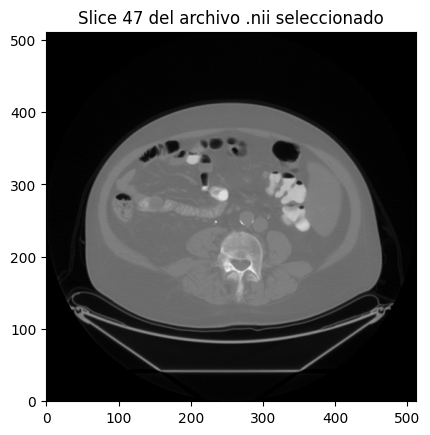

In [ ]:
import os
import random
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt

# Define el directorio donde se encuentran los archivos .nii
nii_directory = '/content/drive/MyDrive/Dataset_ACSI/CT_acsi/'

# Listar todos los archivos .nii en el directorio
nii_files = [f for f in os.listdir(nii_directory) if f.endswith('.nii')]

# Seleccionar un archivo al azar
random_nii_file = random.choice(nii_files)
print(f"Archivo seleccionado: {random_nii_file}")

# Cargar el archivo .nii seleccionado
nii_path = os.path.join(nii_directory, random_nii_file)
img = nib.load(nii_path)

# Obtener los datos de la imagen en formato numpy
img_data = img.get_fdata()

# Mostrar información del archivo cargado
print(f"Dimensiones de la imagen: {img_data.shape}")

# Seleccionar una rebanada en el eje z para visualizar
slice_index = img_data.shape[2] // 2  # Rebanada central
slice_2d = img_data[:, :, slice_index]

# Mostrar la rebanada seleccionada
plt.imshow(slice_2d.T, cmap='gray', origin='lower')
plt.title(f'Slice {slice_index} del archivo .nii seleccionado')
plt.show()

In [ ]:
import os
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt

# Define el directorio donde están los archivos .nii y donde se guardarán los .png
nii_directory = '/content/drive/MyDrive/Dataset_ACSI/CT_acsi/'
output_directory = '/content/drive/MyDrive/Dataset_ACSI/CT_acsi_proce_p1/'

# Crear el directorio de salida si no existe
os.makedirs(output_directory, exist_ok=True)

# Listar todos los archivos .nii en el directorio
nii_files = [f for f in os.listdir(nii_directory) if f.endswith('.nii')]

# Procesar cada archivo .nii
for nii_file in nii_files:
    # Cargar el archivo .nii
    nii_path = os.path.join(nii_directory, nii_file)
    img = nib.load(nii_path)

    # Obtener los datos de la imagen en formato numpy
    img_data = img.get_fdata()

    # Iterar sobre todas las rebanadas del volumen en el eje z
    for i in range(img_data.shape[2]):
        slice_2d = img_data[:, :, i]

        # Crear la ruta de salida para el archivo PNG
        output_file = os.path.join(output_directory, f"{nii_file.split('.')[0]}_slice_{i}.png")

        # Guardar la rebanada como archivo PNG
        plt.imsave(output_file, slice_2d.T, cmap='gray', origin='lower')

    print(f"Procesado {nii_file} y guardado en {output_directory}")

print("¡Todos los archivos .nii han sido procesados y convertidos a .png!")


Procesado Case_00801_0000.nii y guardado en /content/drive/MyDrive/Dataset_ACSI/CT_acsi_proce_p1/
Procesado Case_00805_0000.nii y guardado en /content/drive/MyDrive/Dataset_ACSI/CT_acsi_proce_p1/
Procesado Case_00804_0000.nii y guardado en /content/drive/MyDrive/Dataset_ACSI/CT_acsi_proce_p1/
Procesado Case_00803_0000.nii y guardado en /content/drive/MyDrive/Dataset_ACSI/CT_acsi_proce_p1/
Procesado Case_00802_0000.nii y guardado en /content/drive/MyDrive/Dataset_ACSI/CT_acsi_proce_p1/
¡Todos los archivos .nii han sido procesados y convertidos a .png!


In [ ]:
#Translate AUS to RUS
!python ultrasound_test.py --dataroot /content/drive/MyDrive/Dataset_ACSI/US_acsi/aus2rus/aus2rus --name aus2rus --model cycle_gan --netG unet_256 --input_nc 1 --output_nc 1 --results_dir /content/drive/MyDrive/Dataset_ACSI/US_acsi/aus2rus/aus2rus/results/fakeRUS --direction AtoB

cycleganmodel
----------------- Options ---------------
             aspect_ratio: 1.0                           
               batch_size: 1                             
          checkpoints_dir: ./checkpoints                 
                crop_size: 256                           
                 dataroot: /content/drive/MyDrive/Dataset_ACSI/US_acsi/aus2rus/aus2rus	[default: None]
             dataset_mode: unaligned                     
                direction: AtoB                          
          display_winsize: 256                           
                    epoch: latest                        
                     eval: False                         
                  gpu_ids: 0                             
                init_gain: 0.02                          
                init_type: normal                        
                 input_nc: 1                             	[default: 3]
                  isTrain: False                         	[default: None]


In [ ]:
import pickle
# Guardar el modelo en un archivo pickle
model_filename = '/content/drive/MyDrive/Dataset_ACSI/modelo_entrenado.pkl'

# Guarda el modelo usando pickle
with open(model_filename, 'wb') as model_file:
    pickle.dump(model, model_file)

print(f'Modelo guardado en {model_filename}')


NameError: name 'model' is not defined

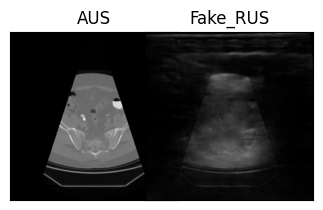

In [ ]:
import os
import random
from PIL import Image
import matplotlib.pyplot as plt

# Define los directorios para imágenes originales y generadas
dir_aus = '/content/drive/MyDrive/Dataset_ACSI/US_acsi/aus2rus/aus2rus/testA_CT/'
dir_fake_rus = '/content/drive/MyDrive/Dataset_ACSI/US_acsi/aus2rus/aus2rus/results/fakeRUS_CT_Test/'

# Selecciona una imagen aleatoria de cada directorio
aus_image = random.choice([f for f in os.listdir(dir_aus) if f.endswith('.jpg') or f.endswith('.png')])
fake_rus_image = aus_image.replace('.jpg', '.png')  # Suponiendo que los nombres son iguales

# Carga las imágenes
aus = Image.open(os.path.join(dir_aus, aus_image))
fake_rus = Image.open(os.path.join(dir_fake_rus, fake_rus_image))

# Crear la figura y agregar los subplots
fig = plt.figure()


ax = fig.add_subplot(2, 1, 1, xticks=[], yticks=[], title='AUS')
plt.imshow(aus)

ax = fig.add_subplot(2, 2, 2, xticks=[], yticks=[], title='Fake_RUS')
plt.imshow(fake_rus)

# Mostrar las imágenes
plt.show()

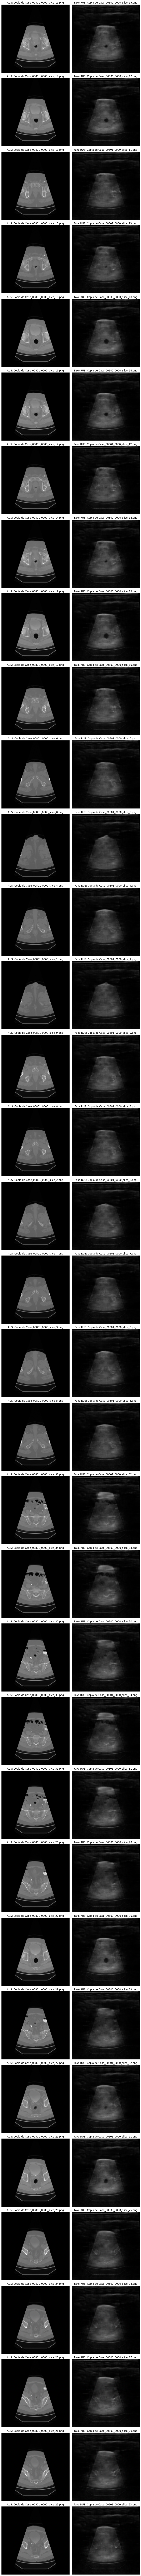

In [ ]:
import os
from PIL import Image
import matplotlib.pyplot as plt

# Define los directorios para imágenes originales y generadas
dir_aus = '/content/drive/MyDrive/Dataset_ACSI/US_acsi/aus2rus/aus2rus/testA_CT/'
dir_fake_rus = '/content/drive/MyDrive/Dataset_ACSI/US_acsi/aus2rus/aus2rus/results/fakeRUS_CT_Test/'

# Obtén la lista de imágenes en el directorio de testA_CT
aus_images = [f for f in os.listdir(dir_aus) if f.endswith('.jpg') or f.endswith('.png')]

# Crear una figura con subplots ajustables
fig, axes = plt.subplots(len(aus_images), 2, figsize=(10, len(aus_images) * 5))

# Recorrer todas las imágenes y mostrarlas en la figura
for i, aus_image in enumerate(aus_images):
    # Cargar la imagen original
    aus = Image.open(os.path.join(dir_aus, aus_image))

    # Suponiendo que los nombres son iguales, cambiar la extensión si es necesario
    fake_rus_image = aus_image.replace('.jpg', '.png')
    fake_rus_path = os.path.join(dir_fake_rus, fake_rus_image)

    # Cargar la imagen generada solo si existe en el directorio de imágenes generadas
    if os.path.exists(fake_rus_path):
        fake_rus = Image.open(fake_rus_path)
    else:
        fake_rus = None

    # Mostrar la imagen original
    axes[i, 0].imshow(aus)
    axes[i, 0].set_title(f'AUS: {aus_image}')
    axes[i, 0].axis('off')

    # Mostrar la imagen generada
    if fake_rus is not None:
        axes[i, 1].imshow(fake_rus)
        axes[i, 1].set_title(f'Fake RUS: {fake_rus_image}')
    else:
        axes[i, 1].set_title(f'Fake RUS: No image found for {aus_image}')

    axes[i, 1].axis('off')

# Ajustar el espaciado de la figura
plt.tight_layout()
plt.show()


In [ ]:
#Translate AUS to RUS
!python ultrasound_test.py --dataroot /content/drive/MyDrive/Dataset_ACSI/US_acsi/aus2rus/aus2rus --name aus2rus --model cycle_gan --netG unet_256 --input_nc 1 --output_nc 1 --results_dir /content/drive/MyDrive/Dataset_ACSI/US_acsi/aus2rus/aus2rus/results/fakeRUS_rando --direction AtoB

cycleganmodel
----------------- Options ---------------
             aspect_ratio: 1.0                           
               batch_size: 1                             
          checkpoints_dir: ./checkpoints                 
                crop_size: 256                           
                 dataroot: /content/drive/MyDrive/Dataset_ACSI/US_acsi/aus2rus/aus2rus	[default: None]
             dataset_mode: unaligned                     
                direction: AtoB                          
          display_winsize: 256                           
                    epoch: latest                        
                     eval: False                         
                  gpu_ids: 0                             
                init_gain: 0.02                          
                init_type: normal                        
                 input_nc: 1                             	[default: 3]
                  isTrain: False                         	[default: None]


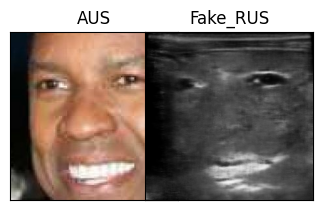

In [ ]:
import os
import random
from PIL import Image
import matplotlib.pyplot as plt

# Define los directorios para imágenes originales y generadas
dir_aus = '/content/drive/MyDrive/Dataset_ACSI/US_acsi/aus2rus/aus2rus/testA_rando/'
dir_fake_rus = '/content/drive/MyDrive/Dataset_ACSI/US_acsi/aus2rus/aus2rus/results/fakeRUS_rando/'

# Selecciona una imagen aleatoria de cada directorio
aus_image = random.choice([f for f in os.listdir(dir_aus) if f.endswith('.jpg') or f.endswith('.png')])
fake_rus_image = aus_image.replace('.jpg', '.png')  # Suponiendo que los nombres son iguales

# Carga las imágenes
aus = Image.open(os.path.join(dir_aus, aus_image))
fake_rus = Image.open(os.path.join(dir_fake_rus, fake_rus_image))

# Crear la figura y agregar los subplots
fig = plt.figure()


ax = fig.add_subplot(2, 1, 1, xticks=[], yticks=[], title='AUS')
plt.imshow(aus)

ax = fig.add_subplot(2, 2, 2, xticks=[], yticks=[], title='Fake_RUS')
plt.imshow(fake_rus)

# Mostrar las imágenes
plt.show()

Ahora ando probando el modelo con imagenes de Denzel Washington. Quise probar con imagenes más tranquis pero estoy con sueño y busque un dataset para trabajar rapido. Practicamente podemos volver cualquier imagen a una imagen de US.
